# Tensorflow Regression

In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys, random

print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

# Import writer class from csv module
from csv import writer

import pandas as pd, numpy as np
from datetime import datetime

import random, time


In [5]:

DEBUG = True
seed = 1919


In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:

modeling_dataset_name = 'modeling_base_2022-12-03.csv'

df_modeling = pd.read_csv(f'{fileloc}/{modeling_dataset_name}')

print(df_modeling.shape)
print()
print(df_modeling.columns.values.tolist())


(588017, 132)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300

In [8]:

print(pd.DataFrame(df_modeling.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  x_num_dogs  position  y_margin  y_pos  Winner_actual  Top3_actual  rand_mean  rand_uniform  \
0        0        0          0       0         0         0          0      0         0      0           0         0         0      0              0            0          0             0   

   position_random  Winner_random  Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  rand_1  ...  x_speed_max_norm  x_speed_range_norm  x_rtgp_prev_norm  x_rtgp_avg_norm  \
0                0              0            0                   0                0              0       0  ...                 0                   0                 0                0   

   x_rtgp_min_norm  x_rtgp_max_norm  x_rtgp_range_norm  xr_wins_norm  xr_wins_pct_norm  xr_fin_t2_norm  xr_fin_t2_pct_norm  xr_wins_l5_norm  xr_wins_l5_pct_norm  xr_finl5_t2_norm  \
0                0                0                  0        

In [9]:

print(pd.DataFrame(df_modeling.dtypes).transpose)


<bound method DataFrame.transpose of                                0
@id_DOG                    int64
DogName                   object
y_runtime                float64
RaceId                     int64
@id_RACE                   int64
...                          ...
xr_fin_last2_pct_norm    float64
xr_finl5_last_norm       float64
xr_finl5_last_pct_norm   float64
xr_finl5_last2_norm      float64
xr_finl5_last2_pct_norm  float64

[132 rows x 1 columns]>


In [10]:

df_modeling.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,...,x_speed_max_norm,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_wins_l5_norm,xr_wins_l5_pct_norm,xr_finl5_t2_norm,xr_finl5_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,xr_fin_last_norm,xr_fin_last_pct_norm,xr_fin_last2_norm,xr_fin_last2_pct_norm,xr_finl5_last_norm,xr_finl5_last_pct_norm,xr_finl5_last2_norm,xr_finl5_last2_pct_norm
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.00,4,0,0,0.5,1.013172,1.0,1,1,5.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,262316194,GO BEZZA,26.87,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,31.0,8,8,12.25,8,0,0,0.5,-0.189445,7.0,0,0,7.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,285758880,LITTLE MIA,26.81,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,21.0,8,7,11.50,7,0,0,0.5,-0.164536,6.0,0,0,6.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,296096035,MY NAMES SERG,26.13,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.8,8,2,1.75,2,0,1,0.5,0.344928,4.0,0,0,2.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,327377954,WYNBURN BABE,26.01,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.0,8,1,1.75,1,1,1,0.5,0.649316,2.0,0,1,1.0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:

df_modeling.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,...,x_speed_max_norm,x_speed_range_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_range_norm,xr_wins_norm,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_wins_l5_norm,xr_wins_l5_pct_norm,xr_finl5_t2_norm,xr_finl5_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,xr_fin_last_norm,xr_fin_last_pct_norm,xr_fin_last2_norm,xr_fin_last2_pct_norm,xr_finl5_last_norm,xr_finl5_last_pct_norm,xr_finl5_last2_norm,xr_finl5_last2_pct_norm
count,5.880170e+05,588017.000000,5.880170e+05,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.0,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,...,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,588017.0,588017.0,5.880170e+05,5.880170e+05,588017.0,588017.0,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05,5.880170e+05
mean,4.619574e+08,24.391543,7.386968e+08,7.386968e+08,16.986033,7.341031,4.168502,6.365959,4.168502,0.138901,0.416311,0.5,0.499795,4.170515,0.138637,0.415911,4.030804,0.144025,0.434047,0.138637,0.019404,-0.032898,0.350065,0.048158,-0.083066,...,1.274563e-16,2.729031e-18,8.130033e-17,-3.028334e-07,4.039395e-17,5.556807e-17,1.442682e-18,0.0,0.0,2.324793e-18,9.324282e-18,0.0,0.0,5.585884e-18,1.666287e-17,1.243301e-18,9.001043e-18,3.577817e-18,7.539764e-18,1.520187e-18,7.617930e-18,1.153419e-17,6.594213e-18,4.358349e-18,2.218711e-17
std,1.145309e+08,4.945432,6.357945e+07,6.357945e+07,21.050777,0.893514,2.162005,4.765762,2.162005,0.345843,0.492947,0.0,0.999205,2.161872,0.345568,0.492879,2.089922,0.351115,0.495632,0.345568,0.137941,1.233311,0.476990,0.214101,1.922300,...,9.251607e-01,9.248996e-01,9.192624e-01,9.224177e-01,9.224112e-01,9.224112e-01,9.178535e-01,0.0,0.0,9.187109e-01,9.187896e-01,0.0,0.0,9.148674e-01,9.150319e-01,9.215129e-01,9.215572e-01,9.118762e-01,9.119377e-01,9.210210e-01,9.210607e-01,8.980526e-01,8.981804e-01,9.200049e-01,9.201010e-01
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.573843,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,...,-2.474848e+00,-2.474874e+00,-2.461040e+00,-2.474590e+00,-2.474239e+00,-2.473485e+00,-2.433908e+00,0.0,0.0,-2.474874e+00,-2.474874e+00,0.0,0.0,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.398022e+00,-2.474874e+00,-2.413317e+00,-2.474874e+00,-2.342156e+00,-2.474874e+00,-2.474874e+00
25%,4.005005e+08,20.540000,6.854128e+08,6.854128e+08,4.200000,7.000000,2.000000,2.500000,2.000000,0.000000,0.000000,0.5,-0.174808,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,-6.793862e-01,-6.789398e-01,-6.307664e-01,-6.166029e-01,-6.192935e-01,-6.265882e-01,-6.404478e-01,0.0,0.0,-6.822210e-01,-6.640806e-01,0.0,0.0,-6.822210e-01,-6.890398e-01,-7.003362e-01,-6.828557e-01,-6.720215e-01,-6.727547e-01,-7.029996e-01,-7.016218e-01,-6.614378e-01,-6.026168e-01,-7.262730e-01,-7.262730e-01
50%,4.569441e+08,23.520000,7.402821e+08,7.402821e+08,8.800000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.499779,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.429438e-02,-1.151546e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,-1.673655e-01,-1.506618e-01,0.0,0.0,-1.336306e-01,-1.261312e-01,-1.537812e-01,-1.

In [12]:

print(datetime.now())

#df_modeling['year'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').year , axis = 1 )
#df_modeling['qtr'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').quarter , axis = 1 )

df_modeling['yearqtr'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').year*100 + pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').quarter , axis = 1 )
df_modeling['yearmon'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').year*100 + pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').month , axis = 1 )

print(datetime.now())


2022-12-04 02:45:39.391653
2022-12-04 02:49:13.513768


In [13]:
# BASED ON SKLEARN

"""
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(df_modeling[features].values, df_modeling[label].values, test_size=0.30, random_state = seed)

print(datetime.now())
"""


'\nfrom sklearn.model_selection import train_test_split\n\n# Split data 70%-30% into training set and test set\nx_train, x_test, y_train, y_test = train_test_split(df_modeling[features].values, df_modeling[label].values, test_size=0.30, random_state = seed)\n\nprint(datetime.now())\n'

In [14]:

# BASED ON RANDOM SAMPLE

"""
samp_size = 0.30
df_rows = df_modeling.shape[0]
train_rows = int(df_rows*(1-samp_size))
test_rows = df_rows - train_rows

df_modeling['ids'] = np.arange(0,df_rows)

#print(df_rows, train_rows, test_rows)

#df.modeling_train =  random.uniform(0, 1)

df_train = df_modeling.sample(train_rows, random_state = seed)
df_train.loc[:,'ttflag'] = 'Train'
df_train_ids = df_train.ids.values.tolist()
#print(len(df_train_ids))

df_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]
df_test.loc[:,'ttflag'] = 'Test'
#print(df_test.shape[0])

x_train = df_train[features].values
x_test = df_test[features].values

y_train = df_train[label].values
y_test = df_test[label].values

print()
print(datetime.now())
print()

print(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

print()
"""


'\nsamp_size = 0.30\ndf_rows = df_modeling.shape[0]\ntrain_rows = int(df_rows*(1-samp_size))\ntest_rows = df_rows - train_rows\n\ndf_modeling[\'ids\'] = np.arange(0,df_rows)\n\n#print(df_rows, train_rows, test_rows)\n\n#df.modeling_train =  random.uniform(0, 1)\n\ndf_train = df_modeling.sample(train_rows, random_state = seed)\ndf_train.loc[:,\'ttflag\'] = \'Train\'\ndf_train_ids = df_train.ids.values.tolist()\n#print(len(df_train_ids))\n\ndf_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]\ndf_test.loc[:,\'ttflag\'] = \'Test\'\n#print(df_test.shape[0])\n\nx_train = df_train[features].values\nx_test = df_test[features].values\n\ny_train = df_train[label].values\ny_test = df_test[label].values\n\nprint()\nprint(datetime.now())\nprint()\n\nprint(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")\n\nprint()\n'

### FREQUENCY ENCODING (Base on Training Data)

In [15]:

print(df_modeling.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', '

In [27]:

print( df_modeling.yearmon.value_counts().sort_index() )


202101    24603
202102    22247
202103    24994
202104    24910
202105    26342
202106    25223
202107    27114
202108    27063
202109    26139
202110    27186
202111    25620
202112    26311
202201    26037
202202    22691
202203    23969
202204    25058
202205    25411
202206    26246
202207    25589
202208    27201
202209    26828
202210    26623
202211    24612
Name: yearmon, dtype: int64


In [101]:

#df_train_raw = df_modeling[ df_modeling.yearqtr <= 202201 ]
df_train_raw = df_modeling[ (df_modeling.yearmon >= 202206) & (df_modeling.yearmon <= 202210) ]
df_train_raw.loc[:,'ttflag'] = 'Train'
print(df_train_raw.shape[0])

#df_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]
#df_test_raw = df_modeling[ df_modeling.yearqtr >= 202202 ]
df_test_raw = df_modeling[ df_modeling.yearmon > 202210 ]
df_test_raw.loc[:,'ttflag'] = 'Test'
print(df_test_raw.shape[0])

print()

gp_track = df_train_raw.groupby('Track').agg({'@id_RACE':'nunique'}).reset_index().rename(columns = {'@id_RACE':'x_track'})
print(gp_track.shape)
print(gp_track.columns.values.tolist())
print()

gp_racegrade = df_train_raw.groupby('RaceGrade').agg({'@id_RACE':'nunique'}).reset_index().rename(columns = {'@id_RACE':'x_racegrade'})
print(gp_racegrade.shape)
print(gp_racegrade.columns.values.tolist())
print()



132487
24612

(53, 2)
['Track', 'x_track']

(88, 2)
['RaceGrade', 'x_racegrade']



/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

#### CREATING a) TRAIN & TEST Datasets

In [102]:

# Getting Rid of Feature Embedding for Track and Grade ( All for later )

"""

df_train = df_train_raw.merge(gp_track, on = 'Track', how = 'left').merge(gp_racegrade, on = 'RaceGrade', how = 'left')
print(df_train.shape)
print(df_train.columns.values.tolist())

x_track_min = min(df_train['x_track'])
x_track_max = max(df_train['x_track'])
x_track_std = np.std(df_train['x_track'])
x_track_mean = np.mean(df_train['x_track'])

print()

x_raceg_min = min(df_train['x_racegrade'])
x_raceg_max = max(df_train['x_racegrade'])
x_raceg_std = np.std(df_train['x_racegrade'])
x_raceg_mean = np.mean(df_train['x_racegrade'])

df_train['x_track_norm'] = (df_train['x_track'] - x_track_mean) / x_track_std
df_train['x_racegrade_norm'] = (df_train['x_racegrade'] - x_raceg_mean) / x_raceg_std

print()
print()

gp_track_for_test = df_train[['Track','x_track']].drop_duplicates()
gp_racegrade_for_test = df_train[['RaceGrade','x_racegrade']].drop_duplicates()

df_test = df_test_raw.merge(gp_track_for_test, on = 'Track', how = 'left').merge(gp_racegrade_for_test, on = 'RaceGrade', how = 'left')
print(df_train.shape)
print(df_train.columns.values.tolist())

df_test['x_track'].fillna(0, inplace = True)
df_test['x_racegrade'].fillna(0, inplace = True)

df_test['x_track_norm'] = (df_test['x_track'] - x_track_mean) / x_track_std
df_test['x_racegrade_norm'] = (df_test['x_racegrade'] - x_raceg_mean) / x_raceg_std

"""

print()


In [103]:

print()

print(pd.DataFrame(df_train.isna().sum()).transpose())

print()
print()

print(pd.DataFrame(df_test.isna().sum()).transpose())

print()



   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  x_num_dogs  position  y_margin  y_pos  Winner_actual  Top3_actual  rand_mean  rand_uniform  \
0        0        0          0       0         0         0          0      0         0      0           0         0         0      0              0            0          0             0   

   position_random  Winner_random  Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  rand_1  ...  xr_wins_pct_norm  xr_fin_t2_norm  xr_fin_t2_pct_norm  xr_wins_l5_norm  \
0                0              0            0                   0                0              0       0  ...                 0               0                   0                0   

   xr_wins_l5_pct_norm  xr_finl5_t2_norm  xr_finl5_t2_pct_norm  xr_fin_plc_norm  xr_fin_plc_pct_norm  xr_fin_last_norm  xr_fin_last_pct_norm  xr_fin_last2_norm  xr_fin_last2_pct_norm  \
0                    0                 0                     

In [104]:

print(df_train.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist300', 'dist350', '

In [105]:

(df_train.shape)
(df_test.shape)


(24612, 140)

#### CREATING b) FEATURES FOR MODEL 

In [106]:

#features = ['x_dist', 'x_no_prev_races', 'x_races_tot', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin']

#, 'xr_finl5_plc_norm', 'xr_finl5_plc_pct_norm'
#, 'dist300' , 'dist350' , 'dist400' , 'dist450' , 'dist500', 'dist600', 'dist700'\
#, 'x_track_norm' , 'x_racegrade_norm'

features = ['x_no_prev_races', 'xr_races_norm'\
            , 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm'\
            , 'x_no_prev_r_in_dist'\
            , 'x_rtgp_prev_norm', 'x_rtgp_avg_norm', 'x_rtgp_min_norm', 'x_rtgp_max_norm'\
                           
            , 'xr_wins_norm', 'xr_wins_pct_norm', 'xr_fin_t2_norm', 'xr_fin_t2_pct_norm', 'xr_fin_plc_norm', 'xr_fin_plc_pct_norm'\
            , 'xr_wins_l5_norm', 'xr_wins_l5_pct_norm', 'xr_finl5_t2_norm', 'xr_finl5_t2_pct_norm'\
                           
            , 'xr_fin_last_norm', 'xr_fin_last_pct_norm', 'xr_fin_last2_norm', 'xr_fin_last2_pct_norm'\
            , 'xr_finl5_last_norm', 'xr_finl5_last_pct_norm', 'xr_finl5_last2_norm', 'xr_finl5_last2_pct_norm'\
            , 'G1', 'G2' , 'G3' , 'G4', 'G5']

random.shuffle(features)

#label = 'y_runtime'
#label = 'y_pos'
#label = 'y_pos_inv'
label = 'y_margin'



In [107]:

print( f' label : {label}, features : {features}')


 label : y_margin, features : ['xr_fin_last2_norm', 'G1', 'x_no_prev_races', 'xr_wins_norm', 'x_rtgp_prev_norm', 'G3', 'xr_wins_pct_norm', 'x_no_prev_r_in_dist', 'xr_fin_last2_pct_norm', 'G2', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_rtgp_min_norm', 'xr_wins_l5_pct_norm', 'x_speed_max_norm', 'xr_finl5_last_norm', 'xr_finl5_t2_pct_norm', 'x_speed_prev_norm', 'G4', 'x_rtgp_avg_norm', 'xr_finl5_last2_norm', 'xr_races_norm', 'xr_fin_plc_pct_norm', 'xr_finl5_last2_pct_norm', 'xr_finl5_t2_norm', 'xr_fin_plc_norm', 'xr_finl5_last_pct_norm', 'xr_fin_last_norm', 'xr_fin_last_pct_norm', 'G5', 'x_rtgp_max_norm', 'xr_fin_t2_pct_norm', 'xr_fin_t2_norm', 'xr_wins_l5_norm']


In [108]:

df_train.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,...,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_wins_l5_norm,xr_wins_l5_pct_norm,xr_finl5_t2_norm,xr_finl5_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,xr_fin_last_norm,xr_fin_last_pct_norm,xr_fin_last2_norm,xr_fin_last2_pct_norm,xr_finl5_last_norm,xr_finl5_last_pct_norm,xr_finl5_last2_norm,xr_finl5_last2_pct_norm,yearqtr,yearmon,ttflag,x_track,x_racegrade,x_track_norm,x_racegrade_norm,preds
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.00,4,0,0,0.5,1.013172,1.0,1,1,5.0,0,0,1,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,202101,Train,626,7248,-1.492531,-0.069671,6.839043
1,262316194,GO BEZZA,26.87,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,31.0,8,8,12.25,8,0,0,0.5,-0.189445,7.0,0,0,7.0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,202101,Train,626,7248,-1.492531,-0.069671,6.839043
2,285758880,LITTLE MIA,26.81,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,21.0,8,7,11.50,7,0,0,0.5,-0.164536,6.0,0,0,6.0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,202101,Train,626,7248,-1.492531,-0.069671,6.839043
3,296096035,MY NAMES SERG,26.13,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.8,8,2,1.75,2,0,1,0.5,0.344928,4.0,0,0,2.0,0,1,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,202101,Train,626,7248,-1.492531,-0.069671,6.839043
4,327377954,WYNBURN BABE,26.01,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.0,8,1,1.75,1,1,1,0.5,0.649316,2.0,0,1,1.0,1,1,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202101,202101,Train,626,7248,-1.492531,-0.069671,6.839043


In [109]:

df_test.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,...,xr_wins_pct_norm,xr_fin_t2_norm,xr_fin_t2_pct_norm,xr_wins_l5_norm,xr_wins_l5_pct_norm,xr_finl5_t2_norm,xr_finl5_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,xr_fin_last_norm,xr_fin_last_pct_norm,xr_fin_last2_norm,xr_fin_last2_pct_norm,xr_finl5_last_norm,xr_finl5_last_pct_norm,xr_finl5_last2_norm,xr_finl5_last2_pct_norm,yearqtr,yearmon,ttflag,x_track,x_racegrade,x_track_norm,x_racegrade_norm,preds
0,148673258,SPEEDY MARINA,17.56,842794635,842794635,287m,Grade 5,Lithgow,2022-11-19,17.0,8,6,12.25,6,0,0,0.5,-0.498311,8.0,0,0,8.0,0,0,0,...,0,-1.086853,-1.515644,0,0,-1.500886,-1.500886,-1.111302,-1.540521,0.381234,0.853338,1.003319,2.052318,0.111013,0.430989,0.976642,0.976642,202204,202211,Test,171,20323.0,-1.958675,1.58079,10.288118
1,359349795,ELWOOD,17.47,842794635,842794635,287m,Grade 5,Lithgow,2022-11-19,10.0,8,5,10.75,5,0,0,0.5,0.666622,6.0,0,0,7.0,0,0,0,...,0,0.362284,-0.335437,0,0,-0.409333,-0.409333,0.406574,-0.497123,1.252624,0.520314,0.348090,-0.114745,1.887225,1.419548,1.686926,1.686926,202204,202211,Test,171,20323.0,-1.958675,1.58079,8.276285
2,491175958,OUR SOOKY,17.57,842794635,842794635,287m,Grade 5,Lithgow,2022-11-19,4.4,8,7,12.25,7,0,0,0.5,0.285891,7.0,0,0,4.0,0,0,0,...,0,2.052945,-0.124933,0,0,-0.409333,-0.409333,1.924449,-0.470880,1.252624,-0.505052,1.822354,0.013035,-0.777093,-0.901417,-1.154213,-1.154213,202204,202211,Test,171,20323.0,-1.958675,1.58079,6.724083
3,556974442,HAY HAY,17.18,842794635,842794635,287m,Grade 5,Lithgow,2022-11-19,1.6,8,2,6.50,2,0,1,0.5,0.845936,5.0,0,0,1.0,1,1,0,...,0,-0.120761,1.968776,0,0,1.773775,1.773775,-0.243944,1.853490,-0.925853,-0.068426,-0.798560,-0.137867,-0.777093,-0.901417,-0.443928,-0.443928,202204,202211,Test,171,20323.0,-1.958675,1.58079,3.976755
4,556974868,BLACK GALAH,18.42,842794635,842794635,287m,Grade 5,Lithgow,2022-11-19,8.0,8,8,24.25,8,0,0,0.5,1.478185,2.0,0,1,6.0,0,0,0,...,0,-0.603807,0.008790,0,0,-0.409333,-0.409333,-0.677623,0.105370,-0.925853,-0.275823,-0.634753,0.310125,-0.777093,-0.901417,0.266357,0.266357,202204,202211,Test,171,20323.0,-1.958675,1.58079,4.187711


In [110]:

# BASED ON DATES

x_train = df_train[features].values
x_test = df_test[features].values

y_train = df_train[label].values
y_test = df_test[label].values

print()
print(datetime.now())
print()

print(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

print()




2022-12-04 04:00:06.882903

x train : (563405, 34), x_test : (24612, 34), y_train : (563405,), y_test : (24612,)



In [111]:

print(df_train.ttflag.value_counts())
print(df_test.ttflag.value_counts())


Train    563405
Name: ttflag, dtype: int64
Test    24612
Name: ttflag, dtype: int64


In [112]:

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(10000,10005):
   print(x_train[n], y_train[n])



Training Set: 563405, Test Set: 24612 

Sample of features and labels:
[ 0.          1.          0.          0.          0.87758958  0.
  0.          0.          0.          0.         -0.58920339 -0.59986025
  0.20631719  0.         -0.43057513  0.          0.86143558 -0.57300804
  0.          0.14137915  0.          1.06066017  0.45420349  0.
  1.15421281  1.06066017  0.          0.          0.          0.
  0.07636312  0.67896165  1.15421281  0.        ] 7.25
[-0.6443571   0.          0.          0.         -1.01003871  0.
  0.          0.         -0.71669949  0.          0.89027262  0.63308774
 -1.31618751  0.          0.89232693 -0.50401613  1.16552179  1.13078181
  0.         -1.35172042 -0.76376262 -0.58514212  1.35376352 -0.76376262
  1.34807555  1.1576657  -0.48403473 -0.64379631 -0.66057915  1.
 -1.37980768  0.88298205  1.34807555  0.        ] 11.0
[ 2.16738299  0.          0.          0.          1.52007813  0.
  0.          0.          1.42670085  0.         -1.4080452  -0.

In [40]:
#!pip install --upgrade tensorflow

In [41]:
#!pip3 install keras --upgrade

In [113]:

print(datetime.now())

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import utils
from tensorflow.keras import optimizers


# Set random seed for reproducability
tf.random.set_seed(seed)

print(datetime.now())


2022-12-04 04:00:06.945443
2022-12-04 04:00:06.951021


In [114]:

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tf.__version__)

print(datetime.now())


Libraries imported.
Keras version: 2.3.0-tf
TensorFlow version: 2.2.0
2022-12-04 04:00:06.961910


In [44]:

# Creating Feature Normalisation

"""
#normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)

#normalizer.adapt(np.array(train_features))
normalizer.adapt(np.array(x_train))

print(normalizer.mean.numpy())
print()

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())
"""


"\n#normalizer = tf.keras.layers.Normalization(axis=-1)\nnormalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)\n\n#normalizer.adapt(np.array(train_features))\nnormalizer.adapt(np.array(x_train))\n\nprint(normalizer.mean.numpy())\nprint()\n\nfirst = np.array(train_features[:1])\n\nwith np.printoptions(precision=2, suppress=True):\n  print('First example:', first)\n  print()\n  print('Normalized:', normalizer(first).numpy())\n"

In [115]:

def custom_loss(X1,X2):
    def loss(y_true,y_pred):
        # I don't have any values for y_true
        z = tf.math.add(X1,tf.math.multiply(X2,X2))
        return tf.math.square(tf.math.subtract(z,y_pred))
        # The "loss" should be [(X1+X2^2)-y_pred]^2
    return loss


In [116]:

def mean_weighted_bce_mse(y_true, y_prediction):
    # Binary crossentropy with weighting
    epsilon = 1e-12
    positive_weight = 4.108897148948174
    loss_positive = y_true * tf.math.log(y_prediction + epsilon)
    loss_negative = (1 - y_true) * tf.math.log(1 - y_prediction + epsilon)
    bce_loss = np.mean(tf.math.negative(positive_weight * loss_positive + loss_negative))
    
    # Mean squared error
    mse = tf.keras.losses.MeanSquaredError()
    mse_loss = mse(y_true, y_prediction)
 
    averaged_bce_mse = (bce_loss + mse_loss) / 2
    return tf.math.reduce_mean(averaged_bce_mse, axis=-1)


In [117]:

def race_loss(y_true, y_pred):
    race_loss = K.abs(y_true - y_pred)/( 1 + y_true)
    return race_loss


In [118]:

def rmse(y_true, y_pred):
    return K.sqrt( K.mean( K.square(y_pred - y_true) ) )


In [119]:

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError


In [120]:

import numpy as np 
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()
        


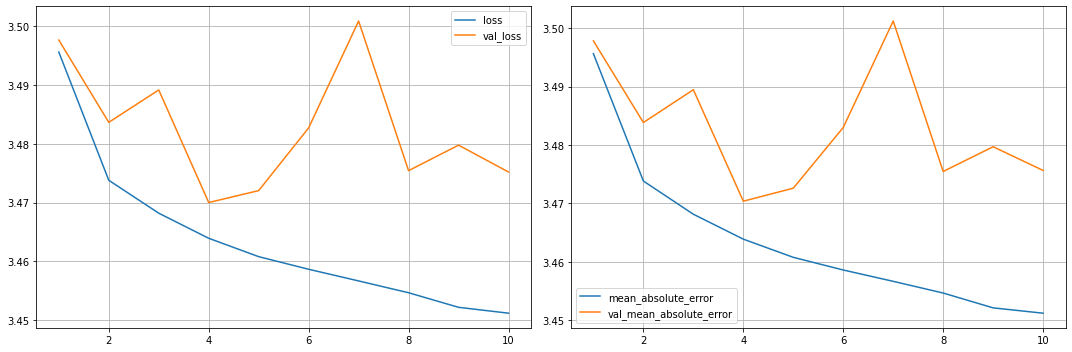

17607/17607 [==============================] - 54s 3ms/step - loss: 3.4511 - mean_absolute_error: 3.4512 - val_loss: 3.4752 - val_mean_absolute_error: 3.4756

2022-12-04 04:14:46.472526


In [122]:

callbacks_list = [PlotLearning()]

del model 

model = Sequential([ Dense(1024, activation='relu'), Dense(512, activation='relu'), Dense(256, activation='relu'), Dense(128, activation='relu'), Dense(1) ])

#model.compile(loss = MeanSquaredError(), optimizer=Adam(), metrics=[ MeanSquaredError() ])
#model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics=[ MeanSquaredError() ])

model.compile(loss = MeanAbsoluteError(), optimizer=Adam(), metrics=[ MeanAbsoluteError() ])
#model.compile(loss = race_loss, optimizer=Adam(), metrics=[race_loss] )

#model.compile(loss = race_loss, optimizer=Adam())
#model.compile(loss=rmse, optimizer=Adam(), metrics=[rmse] )

model.fit(x_train, y_train
          , epochs=10
          ,  validation_data=(x_test, y_test)
          , verbose=1
          , shuffle=True
          ,callbacks=callbacks_list)

print()
print(datetime.now())



In [123]:

ms = model.summary()

print(ms)
    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             multiple                  35840     
_________________________________________________________________
dense_21 (Dense)             multiple                  524800    
_________________________________________________________________
dense_22 (Dense)             multiple                  131328    
_________________________________________________________________
dense_23 (Dense)             multiple                  32896     
_________________________________________________________________
dense_24 (Dense)             multiple                  129       
Total params: 724,993
Trainable params: 724,993
Non-trainable params: 0
_________________________________________________________________
None


In [124]:

stringlist = []
model.summary(print_fn = lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
print(short_model_summary)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             multiple                  35840     
_________________________________________________________________
dense_21 (Dense)             multiple                  524800    
_________________________________________________________________
dense_22 (Dense)             multiple                  131328    
_________________________________________________________________
dense_23 (Dense)             multiple                  32896     
_________________________________________________________________
dense_24 (Dense)             multiple                  129       
Total params: 724,993
Trainable params: 724,993
Non-trainable params: 0
_________________________________________________________________


In [125]:

print(dir(model.loss))


['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allow_sum_over_batch_size', '_fn_kwargs', '_get_reduction', '_keras_api_names', '_keras_api_names_v1', '_name_scope', '_set_name_scope', 'call', 'fn', 'from_config', 'get_config', 'name', 'reduction']


In [126]:

print(model.loss.name)


mean_absolute_error


In [127]:

ms_config = model.get_config()

ms_name = ms_config['name']
ms_num_layers = len(ms_config['layers'])

#ms_config

#ms_config['name']
#print(type(ms_config['layers']))

ms_loss = model.loss.name
ms_optimizer = model.optimizer._name

#print(model.optimizer._name)
#print(model.loss.__name__)


In [128]:

#print(dir(ms))

"""
['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']

"""

#print(dir(model.loss))

"""
['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
"""

#print(dir(model.optimizer))

"""
['_HAS_AGGREGATE_GRAD', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_variable_with_custom_getter', '_aggregate_gradients', '_assert_valid_dtypes', '_call_if_callable', '_checkpoint_dependencies', '_clip_gradients', '_compute_gradients', '_create_all_weights', '_create_hypers', '_create_or_restore_slot_variable', '_create_slots', '_decayed_lr', '_deferred_dependencies', '_deferred_slot_restorations', '_dense_apply_args', '_distributed_apply', '_fallback_apply_state', '_gather_saveables_for_checkpoint', '_get_hyper', '_handle_deferred_dependencies', '_hyper', '_hypers_created', '_init_set_name', '_initial_decay', '_iterations', '_keras_api_names', '_keras_api_names_v1', '_list_extra_dependencies_for_serialization', '_list_functions_for_serialization', '_lookup_dependency', '_maybe_initialize_trackable', '_name', '_name_based_attribute_restore', '_name_based_restores', '_no_dependency', '_object_identifier', '_preload_simple_restoration', '_prepare', '_prepare_local', '_resource_apply_dense', '_resource_apply_sparse', '_resource_apply_sparse_duplicate_indices', '_resource_scatter_add', '_resource_scatter_update', '_restore_from_checkpoint_position', '_restore_slot_variable', '_self_name_based_restores', '_self_setattr_tracking', '_self_unconditional_checkpoint_dependencies', '_self_unconditional_deferred_dependencies', '_self_unconditional_dependency_names', '_self_update_uid', '_serialize_hyperparameter', '_set_hyper', '_setattr_tracking', '_single_restoration_from_checkpoint_position', '_slot_names', '_slots', '_sparse_apply_args', '_track_trackable', '_tracking_metadata', '_unconditional_checkpoint_dependencies', '_unconditional_dependency_names', '_update_uid', '_use_locking', '_valid_dtypes', '_weights', 'add_slot', 'add_weight', 'amsgrad', 'apply_gradients', 'clipnorm', 'clipvalue', 'epsilon', 'from_config', 'get_config', 'get_gradients', 'get_slot', 'get_slot_names', 'get_updates', 'get_weights', 'iterations', 'minimize', 'set_weights', 'variables', 'weights']
"""


"\n['_HAS_AGGREGATE_GRAD', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_variable_with_custom_getter', '_aggregate_gradients', '_assert_valid_dtypes', '_call_if_callable', '_checkpoint_dependencies', '_clip_gradients', '_compute_gradients', '_create_all_weights', '_create_hypers', '_create_or_restore_slot_variable', '_create_slots', '_decayed_lr', '_deferred_dependencies', '_deferred_slot_restorations', '_dense_apply_args', '_distributed_apply', '_fallback_apply_state', '_gather_saveables_for_checkpoint', '_get_hyper', '_handle_deferred_dependencies', '_hyper', '_hypers_created', '_init_set_name', '_initial_decay', '_iterations', '_keras_api_names', '_

In [129]:

predictions_train = model.predict(x_train)
predictions_train = np.ravel(predictions_train)

predictions_test = model.predict(x_test)
predictions_test = np.ravel(predictions_test)


In [130]:

print(rmse(y_train, predictions_train).numpy())

print(rmse(y_test, predictions_test).numpy())


4.570898511428338
4.615896317272388


In [131]:
# Getting the output dataset together

df_train['preds'] = predictions_train
df_test['preds'] = predictions_test

df_master = df_train.append(df_test)
print()

print(df_master.shape)
print()

print(df_master.columns.values.tolist())
print()



(588017, 140)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'RaceName', 'dist30

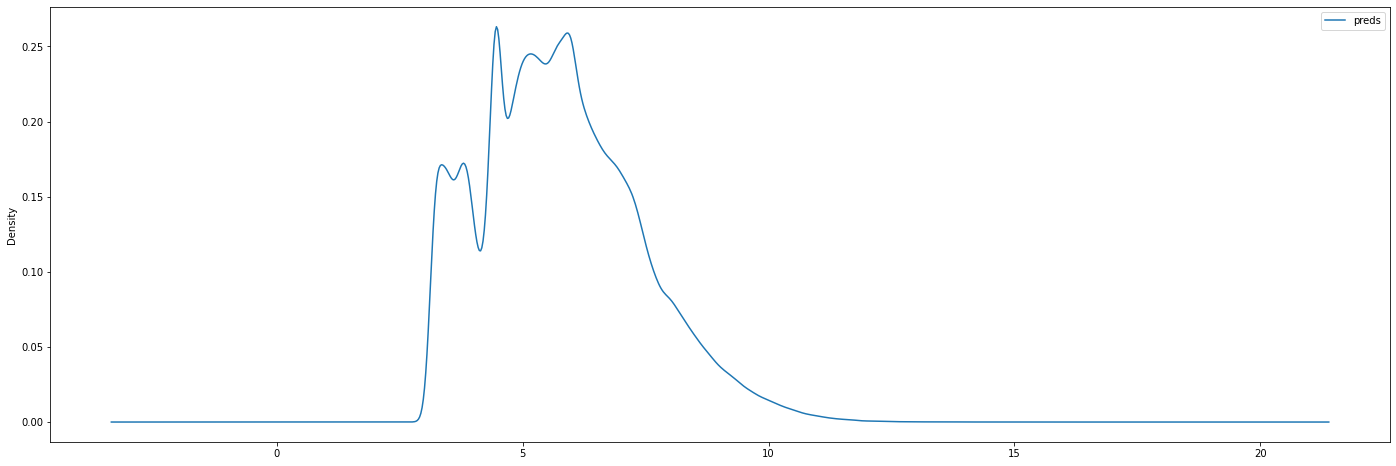

In [132]:

df_train['preds'].plot( kind='density', legend=True, figsize = (24,8) )


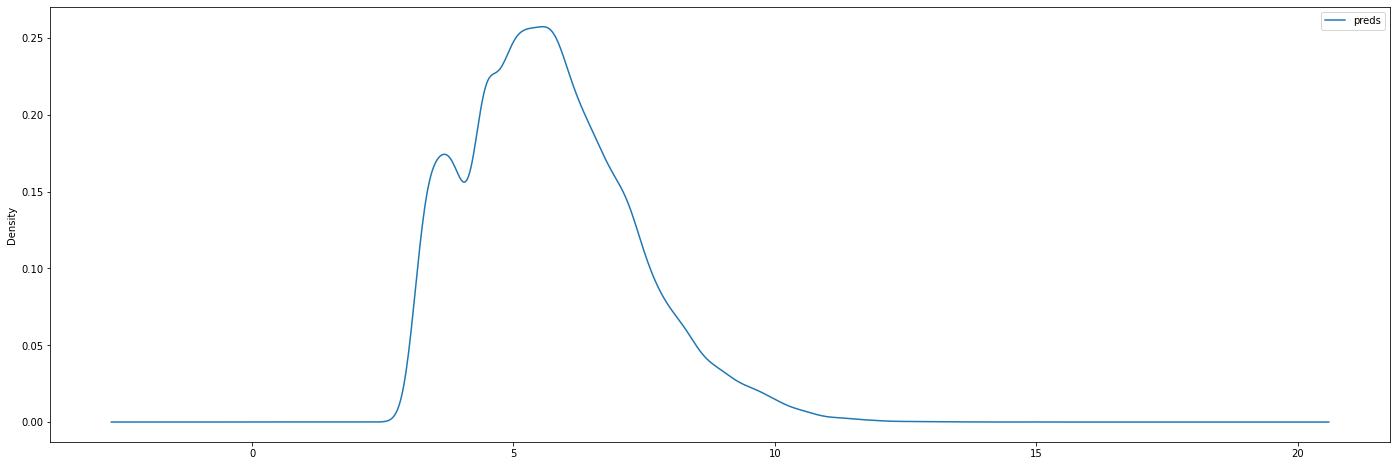

In [133]:

df_test['preds'].plot( kind='density', legend=True, figsize = (24,8) )


In [134]:

#pd.DataFrame(df_test['preds'].value_counts()).head()
#pd.DataFrame(df_test['preds'].value_counts()).shape


#### Creating Model ID for reference in evaluation 

In [135]:

print(time.time()/60)
print(int(time.time()/60))

mid = int(time.time()/60)
#mid = str(datetime.now())
print(mid)


27835456.197683323
27835456
27835456


In [136]:

#del model_chars
model_chars = pd.DataFrame(columns = ['Mid','y','feat', 'name', 'layers', 'cfg', 'loss', 'optimizer'])
rowlist = [ mid, label, features, ms_name, ms_num_layers, ms_config, ms_loss, ms_optimizer  ]

model_chars.loc[ len(model_chars) ] = rowlist 


In [137]:

model_chars.head()


,Mid,y,feat,name,layers,cfg,loss,optimizer
0,27835456,y_margin,"[xr_fin_last2_norm, G1, x_no_prev_races, xr_wi...",sequential_4,5,"{'name': 'sequential_4', 'layers': [{'class_na...",mean_absolute_error,Adam


In [138]:

# Run this if new variable has been added
#model_chars.to_csv(f'{fileloc}/model_chars_master.csv', index = False)


In [139]:

# List that we want to add as a new row
#List = [6, 'William', 5532, 1, 'UAE']
row_to_append = rowlist

# Open our existing CSV file in append mode
# Create a file object for this file
with open(f"{fileloc}/model_chars_master.csv", 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(row_to_append)
 
    # Close the file object
    f_object.close()


#### Preparing the Datset for Export

In [140]:

print(datetime.now())


2022-12-04 04:16:14.794113


In [141]:

print(mid)


27835456


In [142]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_for_drop = ['year','qtr']
cols_for_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag','preds']

todaydt = datetime.now().date()
pred_exp_fname = f"predictions_dataset_shed_{mid}_{todaydt}.csv"

exp_pred_ds = df_master[cols_for_keep]
exp_pred_ds.loc[:,'mid'] = mid

# 3 Minute Export Time


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [143]:

print(datetime.now())


2022-12-04 04:16:15.111431


In [144]:

exp_pred_ds.to_csv(f'{fileloc}/{pred_exp_fname}', index = False)


In [145]:

print(datetime.now())


2022-12-04 04:18:58.782998
